# Stock Market Analysis for Tech Stocks
In this project, we'll analyse data from the stock market for some technology stocks.

Again, we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions we'll try to answer:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

# Visualisation settings
sns.set_style('whitegrid')
%matplotlib inline

In [24]:
# Define the list of tech stocks
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [25]:
# Set the end date to today
end = datetime.now()

# Start date set to 1 year back
start = datetime(end.year - 1, end.month, end.day)

In [26]:
# Fetch the stock data from Yahoo Finance
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-08,148.580002,149.869995,147.460007,147.960007,147.081741,53950200
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.793320,69473000
2022-06-10,140.279999,140.759995,137.059998,137.130005,136.316040,91437900
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.097198,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,131.971970,84784300


In [28]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,152.055857,153.943665,150.428526,152.283824,151.803542,7.402713e+07
std,12.981252,12.767382,13.220553,13.036536,13.118539,2.257616e+07
min,126.010002,127.769997,124.169998,125.019997,124.656982,3.519590e+07
25%,142.699997,144.665001,140.934998,142.915001,142.287239,5.788065e+07
50%,150.639999,153.000000,149.100006,151.000000,150.431915,7.017050e+07
75%,161.580002,163.945000,160.820000,162.969994,162.410652,8.356920e+07
max,182.630005,184.949997,179.259995,180.949997,180.949997,1.647624e+08


In [29]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-08 to 2023-06-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### What's the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

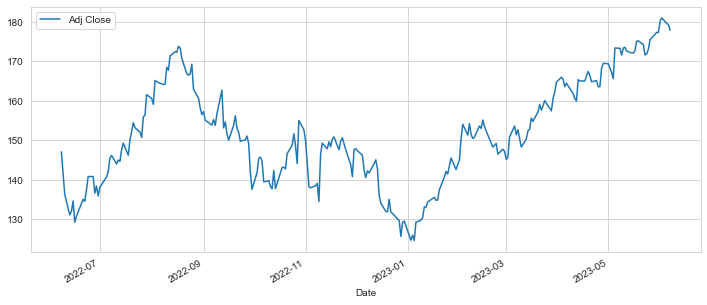

In [30]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

<AxesSubplot:xlabel='Date'>

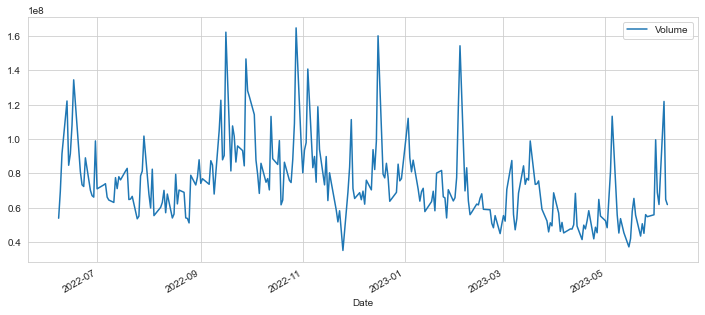

In [31]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

In [32]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [33]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2023-06-01,177.699997,180.119995,176.929993,180.089996,180.089996,68901800,175.087000,173.539232,167.728109
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900,175.676999,174.308682,168.194869
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500,176.118999,174.621169,168.612260
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400,176.620000,174.918652,168.995887
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61889100,177.246001,175.233015,169.391059


<AxesSubplot:xlabel='Date'>

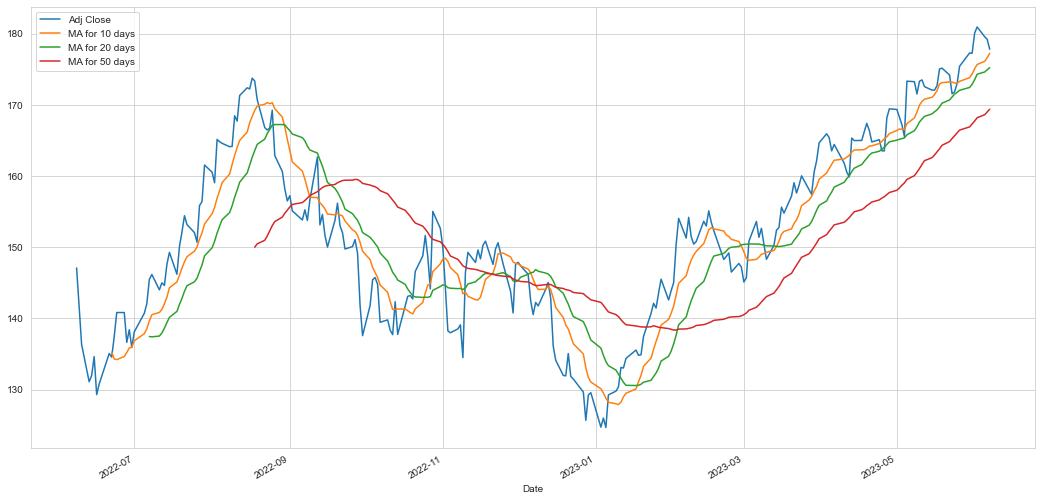

In [35]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(18,9))

### What was the daily return average of a stock?

In [36]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [40]:
AAPL['Daily Return'].tail(7)

Date
2023-05-30    0.010660
2023-05-31   -0.000282
2023-06-01    0.016023
2023-06-02    0.004775
2023-06-05   -0.007571
2023-06-06   -0.002060
2023-06-07   -0.007756
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

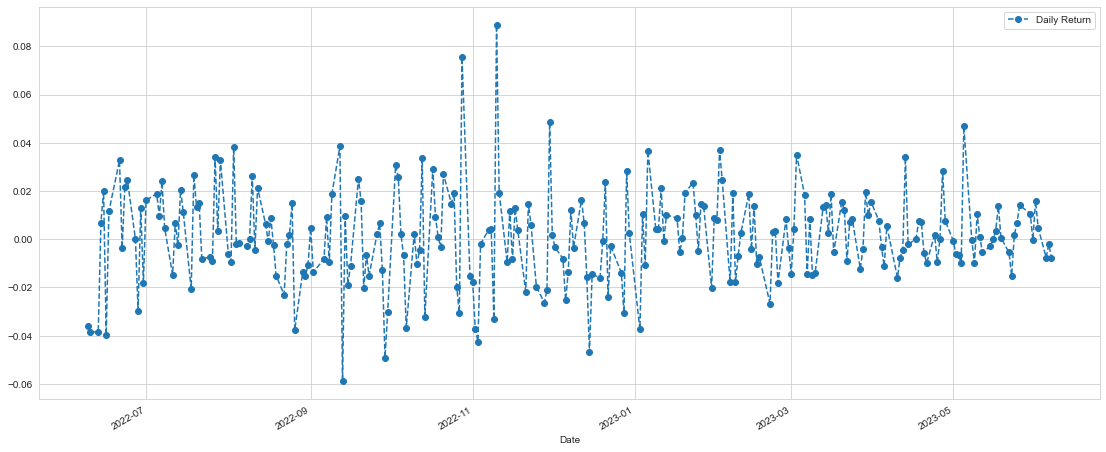

In [39]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(19,8),legend=True,linestyle='--',marker='o')

### What was the correlation between daily returns of different stocks?

In [46]:
close_df = pd.DataFrame()

# Fetch the 'Adj Close' data for each stock symbol
for stock in tech_list:
    data = pdr.get_data_yahoo(stock, start=start, end=end)
    close_df[stock] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
close_df.tail()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2023-06-01,180.089996,123.720001,332.579987,122.769997
2023-06-02,180.949997,124.669998,335.399994,124.250000
2023-06-05,179.580002,126.010002,335.940002,125.300003
2023-06-06,179.210007,127.309998,333.679993,126.610001
2023-06-07,177.820007,122.500000,323.380005,121.230003


In [48]:
rets_df = close_df.pct_change()

In [49]:
rets_df.tail()

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2023-06-01,0.016023,0.006918,0.012759,0.018162
2023-06-02,0.004775,0.007679,0.008479,0.012055
2023-06-05,-0.007571,0.010748,0.001610,0.008451
2023-06-06,-0.002060,0.010317,-0.006727,0.010455
2023-06-07,-0.007756,-0.037782,-0.030868,-0.042493


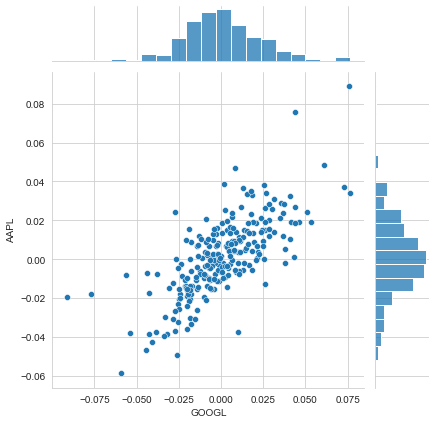

In [53]:
import seaborn as sns

# Calculate the daily returns for each stock
AAPL_returns = AAPL['Adj Close'].pct_change()
GOOGL_returns = GOOGL['Adj Close'].pct_change()

# Create a DataFrame to store the returns
rets_df = pd.DataFrame({'AAPL': AAPL_returns, 'GOOGL': GOOGL_returns}).dropna()

# Plot the jointplot
sns.jointplot(x='GOOGL', y='AAPL', data=rets_df, kind='scatter')

# Display the plot
plt.show()


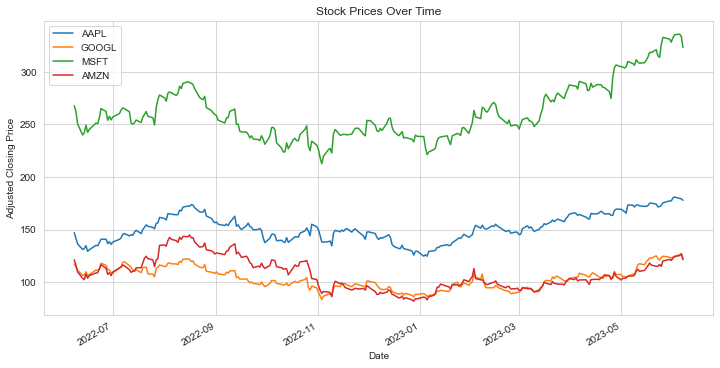

In [54]:
close_df.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()
